Time series analysis is a statistical technique used to analyze and model data that changes over time. It is widely used in various fields such as economics, finance, and weather forecasting. In time series analysis, the data is collected at regular intervals of time, such as hourly, daily, weekly, monthly, etc. The data collected can be either continuous or discrete.

A common problem with time series data is non-stationarity, where the statistical properties of the data change over time. Non-stationarity can be caused by trends, seasonality, and other patterns in the data. These patterns make it difficult to build accurate models and make predictions.

One way to deal with non-stationarity is to use differencing. Differencing is a technique used to remove trends and seasonality from the data, making it stationary. This can be achieved by taking the difference between two consecutive observations or by taking the difference between an observation and an observation from a previous season.

Another technique commonly used in time series analysis is the Autoregressive Integrated Moving Average (ARIMA) model. ARIMA is a mathematical model that uses past values of a time series to make predictions about future values. It consists of three components: Autoregressive (AR), Integrated (I), and Moving Average (MA). ARIMA models are used to model time series data that are stationary.

However, ARIMA models may not be able to capture the complex patterns in non-stationary time series data. In such cases, Seasonal Autoregressive Integrated Moving Average (SARIMA) models can be used. SARIMA models are a variation of ARIMA models that take into account the seasonal component of the data.

In summary, time series analysis is an important technique used in various fields to analyze and model data that changes over time. Differencing and ARIMA models can be used to deal with non-stationary data, while SARIMA models can capture the complex patterns in seasonal time series data.

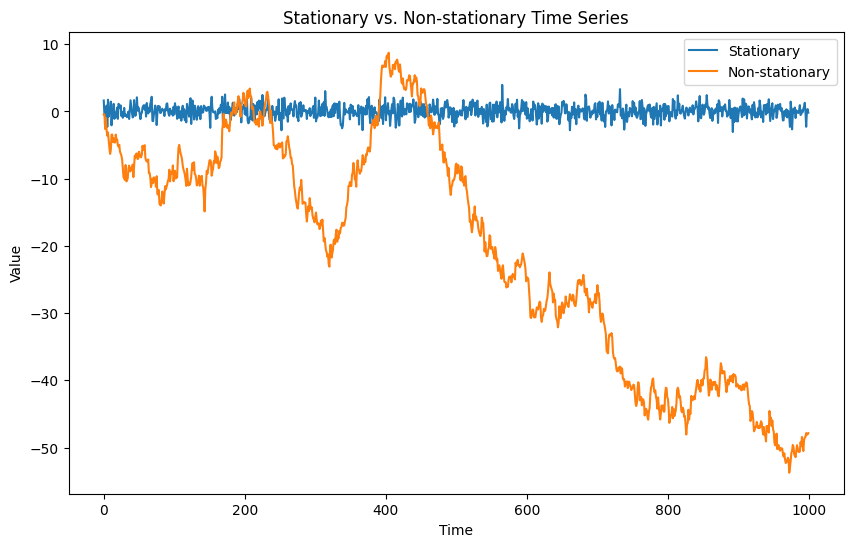

In [2]:
# Comparing stationary and non-stationary data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

data1 = np.random.normal(loc=0, scale=1, size=1000)

np.random.seed(2)
data2 = np.cumsum(np.random.normal(loc=0, scale=1, size=1000))


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data1, label="Stationary")
ax.plot(data2, label="Non-stationary")

ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.set_title("Stationary vs. Non-stationary Time Series")
ax.legend()
plt.show()

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=["Month"], index_col="Month")

In [4]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
data.isna().sum()

Passengers    0
dtype: int64

In [6]:
data.shape

(144, 1)

In [7]:
# Plot the data

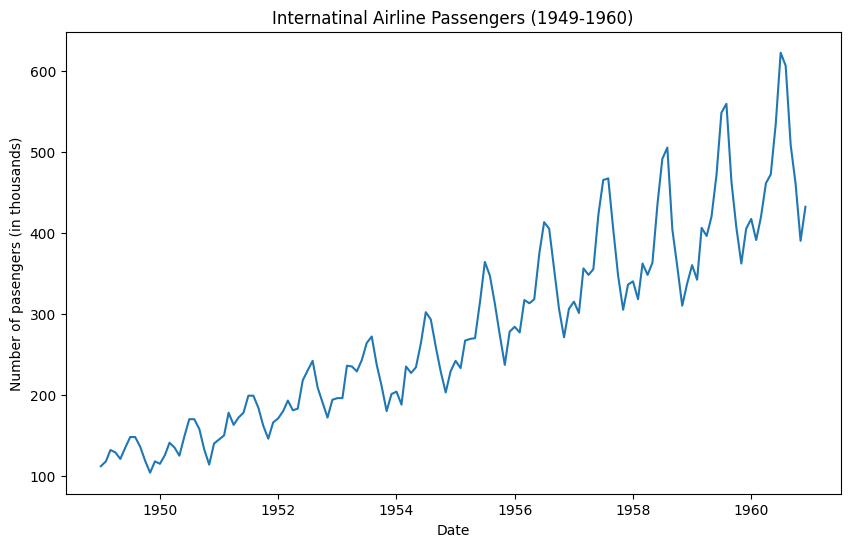

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(data)

plt.xlabel("Date")
plt.ylabel("Number of pasengers (in thousands)")

plt.title("Internatinal Airline Passengers (1949-1960)")

plt.show()

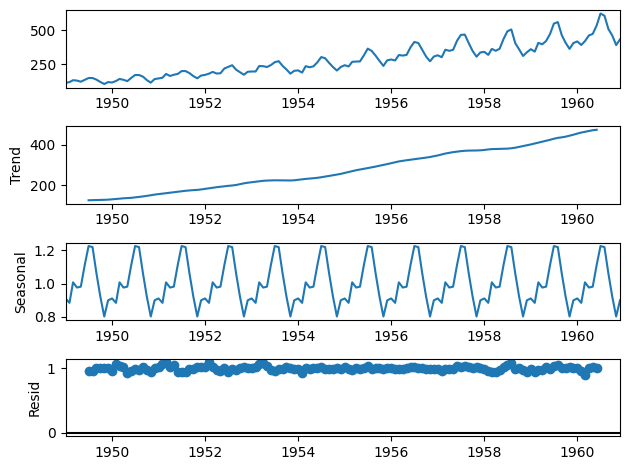

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model="multiplicative", period=12)
result.plot()
plt.show()

# Using ARIMA model to forecast time series data
ARIMA stands for AutoRegressive Integrated Moving Average. It's a popular statistical model used for time series analysis and forecasting. It's a generalization of the simpler ARMA model, which stands for AutoRegressive Moving Average.

ARIMA models are good for modeling time series data that exhibit non-stationary behavior, meaning that the mean or variance of the series changes over time. ARIMA models are capable of capturing both short-term and long-term trends, as well as seasonal patterns.

The values (2, 1, 2) refer to the order of the ARIMA model. The first number represents the order of the autoregressive (AR) component, the second number represents the degree of differencing, and the third number represents the order of the moving average (MA) component. In this case, we're using an ARIMA(2,1,2) model, which means we have a second-order autoregressive component, a first-order differencing, and a second-order moving average component.

The steps argument in get_forecast specifies how many steps ahead we want to forecast. In this case, we're forecasting 12 steps ahead, which corresponds to the next 12 months. The alpha argument specifies the level of significance for the confidence intervals. In this case, we're using a 95% confidence level, which corresponds to an alpha of 0.05.

The predicted_mean is the mean of the forecasted values, and conf_int is a 2-dimensional array containing the upper and lower bounds of the confidence intervals for the forecasted values. We're creating a DataFrame from the conf_int array and using it to fill the area between the upper and lower bounds of the confidence intervals in the plot.

c:\code\iths2\python-ai_mar-may-23\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


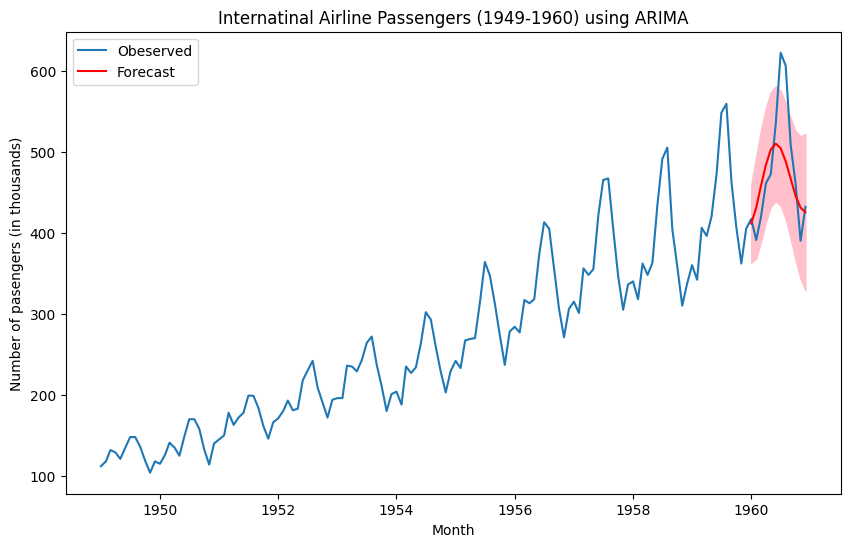

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets. We will set aside the last 12 months for testing
train_data, test_data = data[:-12], data[-12:]

model = ARIMA(train_data, order=(2, 1, 2))
fit_result = model.fit()

forecast_result = fit_result.get_forecast(steps=12, alpha=0.05)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()


# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(data, label="Obeserved")
plt.plot(pd.date_range(train_data.index[-1], periods=13, freq="MS")[1:], forecast, label="Forecast", color="r")
plt.fill_between(pd.date_range(train_data.index[-1], periods=13, freq="MS")[1:], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="pink")

plt.xlabel("Month")
plt.ylabel("Number of pasengers (in thousands)")
plt.title("Internatinal Airline Passengers (1949-1960) using ARIMA")

plt.legend()
plt.show()

The diagram shows the observed and forecasted values for the International Airline Passengers dataset from 1949 to 1960. The blue line represents the observed values, while the red line represents the forecasted values from the ARIMA model. The light pink area around the red line represents the 95% confidence interval for the forecast.

It can be seen that the ARIMA model was able to capture the overall trend in the data, with the forecasted values following a similar path to the observed values. However, the model was not able to capture the seasonality of the data very well, particularly in the middle of the time series. The peak in the observed values in 1960 is much higher than the peak in the forecasted values, indicating that the model underestimated the seasonal effect.

Overall, the ARIMA model provides a decent forecast for the trend in the data, but it may not be the best model for capturing seasonality.

## Explantaion of the plot for predictions
The train_data.index[-1] retrieves the last index value (i.e. the latest date) from the training data. The purpose of this is to start the pd.date_range from the date immediately following the last date in the training data, which is where the predictions start.

pd.date_range(train_data.index[-1], periods=13, freq='MS') creates a DatetimeIndex with 13 periods, each one month apart, starting from the date immediately following the last date in the training data. The frequency 'MS' stands for month start frequency, which ensures that each period starts at the beginning of a month.
[1:] slices the resulting DatetimeIndex to exclude the first value, which corresponds to the starting date of the predictions. We don't want to include this value because it's already covered by the training data.
forecast is the array of predicted values.

Finally, plt.plot is used to plot the predicted values against the dates in the DatetimeIndex. The color parameter specifies the color of the line.
So, altogether, the purpose of this code is to plot the predicted values against the correct dates in the graph, starting from the first month after the training data, and excluding the first value since it's already covered by the training data.

#### Why 13 periods?
The periods parameter in the pd.date_range() function specifies the number of time periods to generate. In this case, it is set to 13, which means that we want to generate 13 periods in the future.

However, the freq parameter is set to 'MS', which means that we want to generate periods with monthly frequency starting from the first day of the month. Therefore, the first generated period will be the first day of the next month after the last month in the train_data dataset. Since we are using train_data.index[-1] to get the last month in the dataset, we need to add one month to it to get the first day of the next month, which is why we use train_data.index[-1] + MonthBegin(1).

So the pd.date_range() function generates 13 periods in the future starting from the first day of the next month after the last month in the train_data dataset. We use pd.date_range()[1:] to exclude the first generated period, which is the first day of the next month after the last month in the train_data dataset.

Therefore, we are actually generating 12 periods into the future, which corresponds to one year of monthly data. The reason why we use 13 instead of 12 is to exclude the first generated period, which we do not need for plotting the forecast.

# Using SARIMA to capture seasonality (Seasonal ARIMA)
We use SARIMA, Seasonal Autoregressive Integrated Moving Average, to capture the seasonality in our time series data. SARIMA extends the ARIMA model by adding seasonal components. It's suitable for time series with a clear seasonal pattern.

The order parameter (2, 1, 2) specifies the number of AR, I, and MA terms in the model, respectively. The values are selected based on the ACF and PACF plots, where we looked for significant spikes at lags 1 and 12.

The seasonal_order parameter (1, 1, 1, 12) specifies the seasonal components of the model. The first three values specify the seasonal AR, I, and MA terms, while the fourth value specifies the period of the seasonality, which is 12 months in our case.

The order parameter specifies the autoregressive (AR) order, the integrated (I) order, and the moving average (MA) order of the non-seasonal part of the model, while the seasonal_order parameter specifies the same for the seasonal part of the model.

So, in the case of (2, 1, 2) and (1, 1, 1, 12), the non-seasonal part has an AR order of 2, an I order of 1, and an MA order of 2, while the seasonal part has an AR order of 1, an I order of 1, and an MA order of 1, with a seasonality of 12.

c:\code\iths2\python-ai_mar-may-23\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


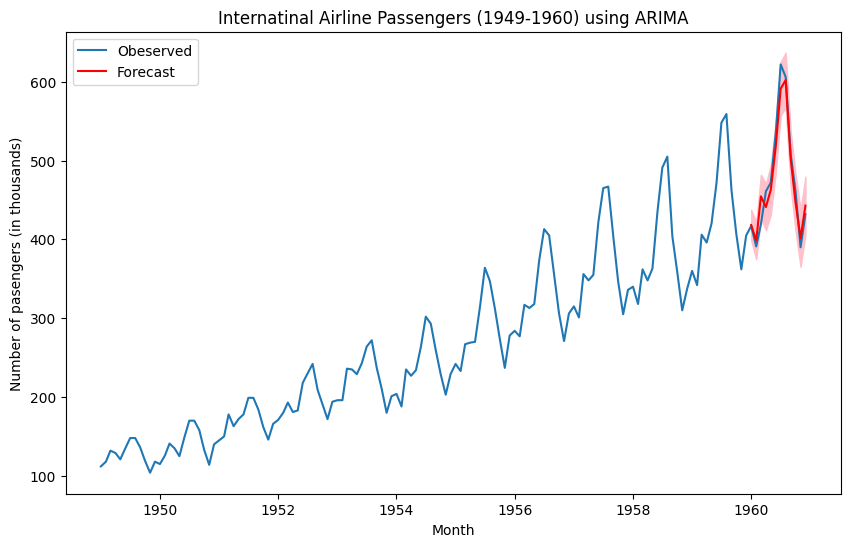

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split the data into training and testing sets. We will set aside the last 12 months for testing
train_data, test_data = data[:-12], data[-12:]

model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
fit_result = model.fit()

forecast_result = fit_result.get_forecast(steps=12, alpha=0.05)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()


# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(data, label="Obeserved")
plt.plot(pd.date_range(train_data.index[-1], periods=13, freq="MS")[1:], forecast, label="Forecast", color="r")
plt.fill_between(pd.date_range(train_data.index[-1], periods=13, freq="MS")[1:], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="pink")

plt.xlabel("Month")
plt.ylabel("Number of pasengers (in thousands)")
plt.title("Internatinal Airline Passengers (1949-1960) using ARIMA")

plt.legend()
plt.show()

## Simple Moving Average (SMA)

Simple Moving Average is a time series model that is used to identify trends in the data by taking the average of a subset of the data. This subset is usually defined by a window size or time period. The moving average is calculated by taking the sum of the values over the window size and dividing by the number of observations in the window. This process is repeated for each window in the time series. SMA is easy to implement and can be used to smooth out the noise in the data.

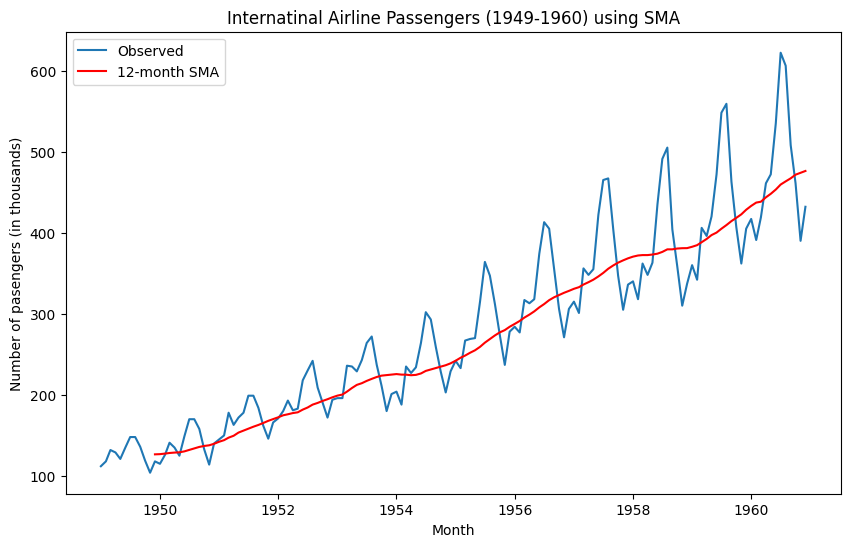

In [16]:
window_size = 12
sma = data.rolling(window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(data, label="Observed")
plt.plot(sma, label=f"{window_size}-month SMA", color="r")

plt.xlabel("Month")
plt.ylabel("Number of pasengers (in thousands)")
plt.title("Internatinal Airline Passengers (1949-1960) using SMA")

plt.legend()
plt.show()

As we can see, the SMA model doesn't capture the seasonality of the data very well, but it does provide a smoothed version of the original time series.

## Seasonal Decomposition of Time Series (STL)
Seasonal Decomposition Loess of Time Series is a model that breaks down a time series into its trend, seasonal, and residual components. It is useful for analyzing the patterns in the data and separating out the seasonality. The STL model uses a moving average filter to estimate the trend component and a seasonal filter to estimate the seasonal component. The residual component is the difference between the original data and the sum of the trend and seasonal components. STL is a powerful tool for analyzing complex time series data and can be used to forecast future values

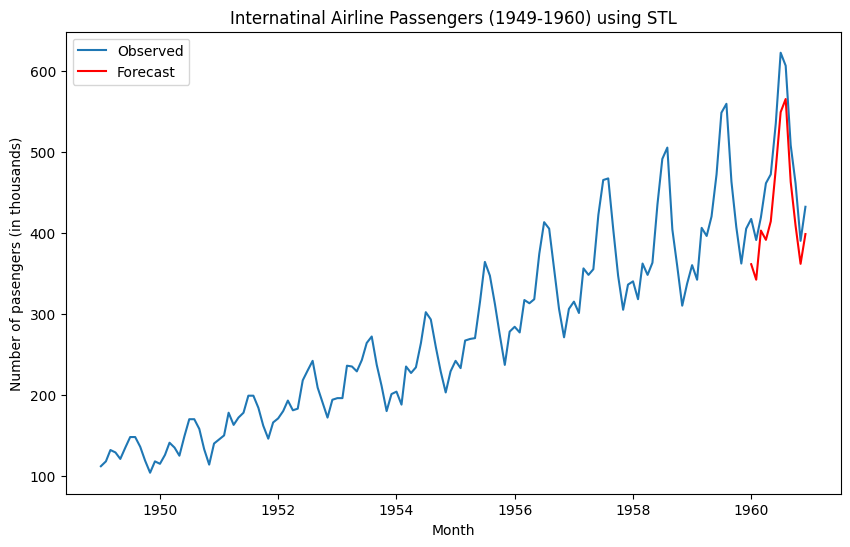

In [22]:
from statsmodels.tsa.seasonal import STL

train_data, test_data = data[:-12], data[-12:]

stl_decomp = STL(train_data, period=12)
res = stl_decomp.fit()

trend_forecast = res.trend[-12:]  # Use last 12 trend values as forecast
seasonal_forecast = res.seasonal[-12:]  # Use las 12 seasonal values as forecast
forecast = trend_forecast + seasonal_forecast

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data, label="Observed")
plt.plot(pd.date_range(train_data.index[-1], periods=13, freq="MS")[1:], forecast, label="Forecast", color="r")

plt.xlabel("Month")
plt.ylabel("Number of pasengers (in thousands)")
plt.title("Internatinal Airline Passengers (1949-1960) using STL")

plt.legend()
plt.show()


## Holt-Winters Method

Holt-Winters Method is a time series model that is used to forecast future values based on trends, seasonality, and level of the data. It is also known as Triple Exponential Smoothing. The model uses a weighted average of the past observations to forecast future values. The weights are calculated based on the level, trend, and seasonality of the data. The Holt-Winters Method is useful for forecasting time series data that has both trend and seasonality. The model is more complex than the other models, but it can provide more accurate forecasts.

In Exponential Smoothing, the seasonal parameter is used to specify whether the seasonal component of the time series is additive or multiplicative.

If the seasonal variation in the time series is relatively constant across time, then the seasonal component is considered to be additive. On the other hand, if the seasonal variation in the time series is changing over time, then the seasonal component is considered to be multiplicative.

In this case, the seasonal parameter is set to multiplicative, indicating that the seasonal component of the time series is changing over time, and that the seasonal component is best modeled using a multiplicative approach. The trend parameter is set to additive, indicating that the trend component is best modeled using an additive approach, where the change in the trend over time is constant.

c:\code\iths2\python-ai_mar-may-23\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


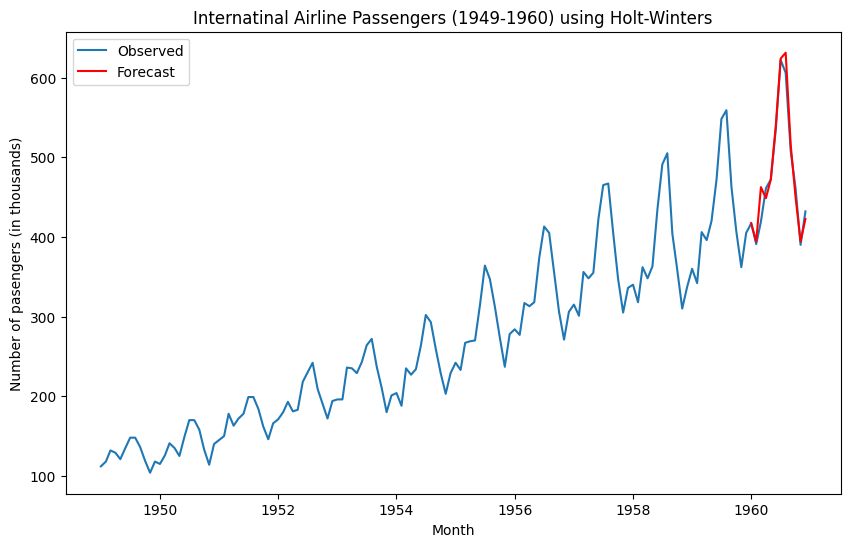

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_data, test_data = data[:-12], data[-12:]

model = ExponentialSmoothing(train_data, seasonal="multiplicative", seasonal_periods=12, trend="additive")
fit_result = model.fit()
forecast = fit_result.forecast(steps=12)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data, label="Observed")
plt.plot(pd.date_range(train_data.index[-1], periods=13, freq="MS")[1:], forecast, label="Forecast", color="r")

plt.xlabel("Month")
plt.ylabel("Number of pasengers (in thousands)")
plt.title("Internatinal Airline Passengers (1949-1960) using Holt-Winters")

plt.legend()
plt.show()